# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
*

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={api_key}&units=imperial&q="

In [4]:
#run a test to see data and [u]
test3 = requests.get(query_url + 'New York').json()
test3
#gotta dig into dic
#response['name']
#response['clouds']['all']
#response['sys']['country']
#response['dt']
#response['main']['temp']
#response['coord']['lon']
#response['coord']['lat']
#response['main']['temp_max']
#response['wind']['speed']

{'coord': {'lon': -73.99, 'lat': 40.73},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 57.67,
  'pressure': 1017,
  'humidity': 93,
  'temp_min': 55,
  'temp_max': 60.01},
 'visibility': 16093,
 'wind': {'speed': 4.7, 'deg': 270},
 'clouds': {'all': 90},
 'dt': 1555987454,
 'sys': {'type': 1,
  'id': 4610,
  'message': 0.0103,
  'country': 'US',
  'sunrise': 1555927616,
  'sunset': 1555976502},
 'id': 5128581,
 'name': 'New York',
 'cod': 200}

In [22]:
weather_df = pd.DataFrame({'City' : cities})
weather_df['Cloudiness'] = ''
weather_df['Country'] = ''
weather_df['Date'] = ''
weather_df['Humidity'] = ''
weather_df['Lat'] = ''
weather_df['Lng'] = ''
weather_df['Max Speed'] = ''
weather_df['Wind Speed'] = ''
weather_df['Temp (F)'] = ''
row_count = 0
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Speed,Wind Speed,Temp (F)
0,codrington,,,,,,,,,
1,vila franca do campo,,,,,,,,,
2,torbay,,,,,,,,,
3,yumen,,,,,,,,,
4,atuona,,,,,,,,,


In [23]:
print('Executing Data Retrieval')
for index, row in weather_df.iterrows():
    city = row['City']
    response = requests.get(query_url + city).json()
    
    if response["cod"] == "404":
        print('City is no bueno... skipping city...')
        weather_df.loc[index, 'Country'] = 'Drop'
    else: 

        print(f' Processing Record {row_count} for {city}')

        weather_df.loc[index, 'Cloudiness'] = float(response['clouds']['all'])
        weather_df.loc[index, 'Country'] = (response['sys']['country'])
        weather_df.loc[index, 'Date'] = response['dt']
        weather_df.loc[index, 'Humidity'] = float(response['main']['humidity'])
        weather_df.loc[index, 'Lat'] = float(response['coord']['lat'])
        weather_df.loc[index, 'Lng'] = float(response['coord']['lon'])
        weather_df.loc[index, 'Max Speed'] = float(response['main']['temp_max'])
        weather_df.loc[index, 'Wind Speed'] = float(response['wind']['speed'])
        weather_df.loc[index, 'Temp (F)'] = float(response["main"]["temp"])
        row_count = row_count + 1
#        weather_df[weather_df.name != city]
#        row_count = row_count + 1

Executing Data Retrieval
 Processing Record 0 for codrington
 Processing Record 1 for vila franca do campo
 Processing Record 2 for torbay
 Processing Record 3 for yumen
 Processing Record 4 for atuona
 Processing Record 5 for thompson
City is no bueno... skipping city...
City is no bueno... skipping city...
 Processing Record 6 for hermanus
 Processing Record 7 for ushuaia
 Processing Record 8 for sorel
City is no bueno... skipping city...
 Processing Record 9 for alyangula
 Processing Record 10 for paamiut
 Processing Record 11 for zhaozhou
 Processing Record 12 for cockburn town
 Processing Record 13 for carnarvon
 Processing Record 14 for samarai
 Processing Record 15 for vetapalem
 Processing Record 16 for tiznit
 Processing Record 17 for puerto ayora
 Processing Record 18 for bluff
 Processing Record 19 for sirsi
 Processing Record 20 for port alfred
 Processing Record 21 for saskylakh
 Processing Record 22 for pangai
 Processing Record 23 for new norfolk
 Processing Record 24 fo

 Processing Record 204 for churapcha
 Processing Record 205 for medicine hat
 Processing Record 206 for ancud
City is no bueno... skipping city...
 Processing Record 207 for chor
 Processing Record 208 for mar del plata
 Processing Record 209 for hilo
 Processing Record 210 for lake charles
 Processing Record 211 for ialibu
 Processing Record 212 for shimoda
 Processing Record 213 for caraquet
 Processing Record 214 for batsfjord
 Processing Record 215 for bacolod
City is no bueno... skipping city...
 Processing Record 216 for alibag
 Processing Record 217 for mitu
 Processing Record 218 for vila velha
 Processing Record 219 for aizawl
 Processing Record 220 for sao joao da barra
 Processing Record 221 for malur
 Processing Record 222 for san patricio
City is no bueno... skipping city...
 Processing Record 223 for sedniv
 Processing Record 224 for clarksburg
 Processing Record 225 for half moon bay
 Processing Record 226 for svirstroy
 Processing Record 227 for santa maria del oro
 Pro

 Processing Record 405 for vienenburg
 Processing Record 406 for langsa
City is no bueno... skipping city...
 Processing Record 407 for muros
 Processing Record 408 for bourges
 Processing Record 409 for skjervoy
 Processing Record 410 for kudahuvadhoo
 Processing Record 411 for zalantun
City is no bueno... skipping city...
 Processing Record 412 for batken
 Processing Record 413 for ilinskiy
City is no bueno... skipping city...
 Processing Record 414 for pedasi
 Processing Record 415 for san jose
 Processing Record 416 for narok
 Processing Record 417 for araouane
City is no bueno... skipping city...
 Processing Record 418 for fukue
 Processing Record 419 for kichmengskiy gorodok
 Processing Record 420 for otta
 Processing Record 421 for san cristobal
 Processing Record 422 for kruisfontein
 Processing Record 423 for dukat
 Processing Record 424 for nome
 Processing Record 425 for pekan
 Processing Record 426 for oksfjord
 Processing Record 427 for ashington
 Processing Record 428 for

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
weather_df =  weather_df[weather_df.Country != 'Drop']

In [25]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 626
Data columns (total 10 columns):
City          563 non-null object
Cloudiness    563 non-null object
Country       563 non-null object
Date          563 non-null object
Humidity      563 non-null object
Lat           563 non-null object
Lng           563 non-null object
Max Speed     563 non-null object
Wind Speed    563 non-null object
Temp (F)      563 non-null object
dtypes: object(10)
memory usage: 48.4+ KB


In [26]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Speed,Wind Speed,Temp (F)
0,codrington,40,AU,1555988407,57,-28.95,153.24,79,9.17,77.94
1,vila franca do campo,20,PT,1555988542,71,37.72,-25.43,55,4.7,54.34
2,torbay,90,CA,1555988557,100,47.66,-52.73,45,10.29,43.36
3,yumen,100,CN,1555988562,31,40.29,97.04,64.9,16.64,64.9
4,atuona,6,PF,1555988563,75,-9.8,-139.03,84.19,17.87,84.19
5,thompson,20,CA,1555984800,48,55.74,-97.86,42.8,2.24,42.8
8,hermanus,39,ZA,1555988483,83,-34.42,19.24,64.99,8.99,64.54
9,ushuaia,75,AR,1555984800,75,-54.81,-68.31,42.8,29.97,42.8
10,sorel,1,CA,1555988525,66,46.04,-73.1,55,11.41,50.83
12,alyangula,40,AU,1555984800,59,-13.85,136.42,89.6,9.17,89.6


In [31]:
weather_df.to_csv("Weather_Data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

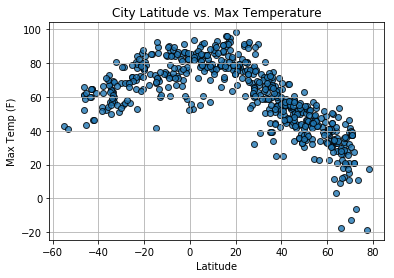

In [32]:

plt.scatter(weather_df["Lat"], weather_df["Temp (F)"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="City")

# Titles
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save figure
plt.savefig("Lat_Temp.png")

# Show
plt.show()

#### Latitude vs. Humidity Plot

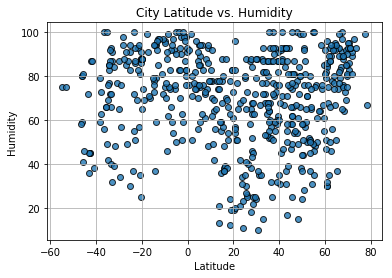

In [33]:

plt.scatter(weather_df["Lat"], weather_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="City")

# Titles
plt.title(f"City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#save figure
plt.savefig("Lat_Humidity.png")

# Show
plt.show()

#### Latitude vs. Cloudiness Plot

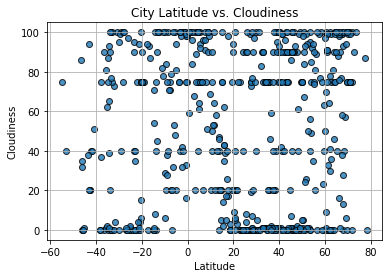

In [34]:

plt.scatter(weather_df["Lat"], weather_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="City")

# Titles
plt.title(f"City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save figure
plt.savefig("Lat_Cloudiness.png")

# Show
plt.show()

#### Latitude vs. Wind Speed Plot

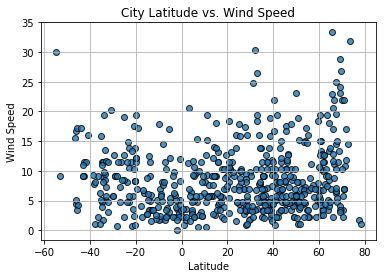

In [35]:

plt.scatter(weather_df["Lat"], weather_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="City")

# Titles
plt.title(f"City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#save figure
plt.savefig("Lat_Wind.png")

# Show
plt.show()